In [1]:
%matplotlib inline
import sys
sys.path.append("..")
import numpy as np
from matplotlib import pyplot as plt
import igraph

import pythd

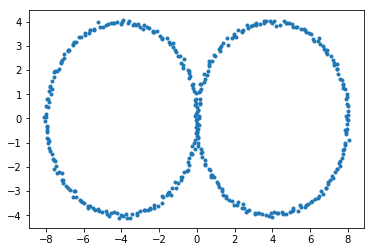

In [2]:
# Create and show two circles with some noise
dataset = (pythd.datagen.DatasetGenerator()
                .circle(center=[-4.0, 0.0], radius=4.0, noise=0.06, num_points=200)
                .circle(center=[4.0, 0.0], radius=4.0, noise=0.06, num_points=200)).get()
plt.plot(dataset[:, 0], dataset[:, 1], ".")
plt.show()

In [57]:
# Setup MAPPER
filt = pythd.filter.IdentityFilter()
f_x = filt(dataset)
print(f_x.shape)
cover = pythd.cover.IntervalCover.EvenlySpacedFromValues(f_x, 4, 0.5)
clustering = pythd.clustering.HierarchicalClustering()

(400, 2)


In [58]:
# Run MAPPER
mapper = pythd.mapper.MAPPER(filter=filt, cover=cover, clustering=clustering)
res = mapper.run(dataset)

In [59]:
# Create igraph graph
g = res.get_igraph_network()
print(g)

IGRAPH UN-- 16 26 --
+ attr: name (v), points (v)
+ edges (vertex names):
 0 -- 1, 2, 3, 10, 11    5 -- 1, 3, 4, 14       10 -- 0, 2, 9, 11       15 --
11, 12
 1 -- 0, 2, 3, 4, 5      6 -- 4, 7              11 -- 0, 2, 10, 15
 2 -- 0, 1, 3, 10, 11    7 -- 6, 8              12 -- 13, 15
 3 -- 0, 1, 2, 4, 5      8 -- 7, 9              13 -- 12, 14
 4 -- 1, 3, 5, 6         9 -- 8, 10             14 -- 5, 13


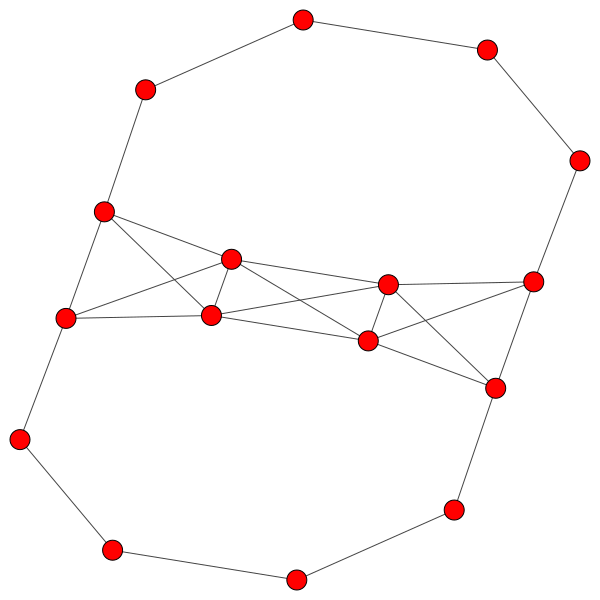

In [60]:
# Visualize the graph
layout = g.layout_kamada_kawai()
igraph.plot(g, layout=layout)

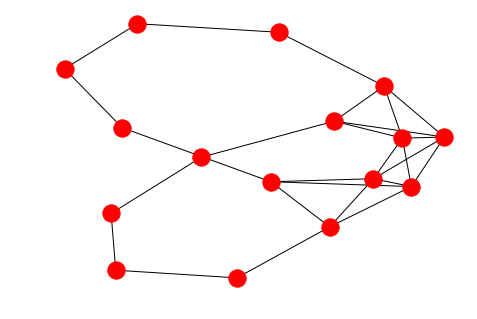

In [61]:
# Visualize with networkx
import networkx as nx
g = res.get_networkx_network()
nx.draw(g)

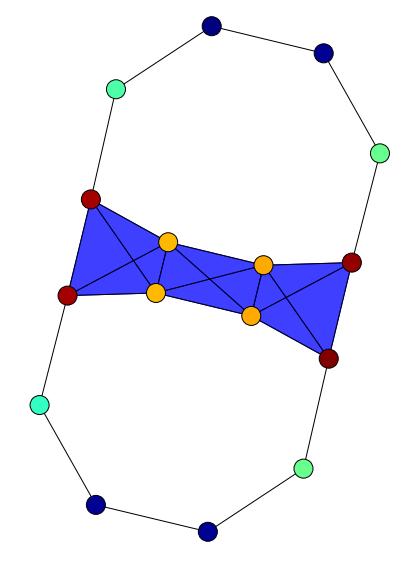

In [62]:
from importlib import reload
import pythd.plotting as plot
reload(plot)
plot.draw_2_skeleton(res.compute_k_skeleton(k=2), layout)